(gallery-vis-pv-streamlines)=

# Field lines with Pyvista streamlines

Pyvista offers field-line computation and visualization in 3D. In addition to the field computation, Magpylib offers magnet visualization that seamlessly integrates into a Pyvista plotting scene.

/home/docs/checkouts/readthedocs.org/user_builds/magpylib/envs/stable/lib/python3.9/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


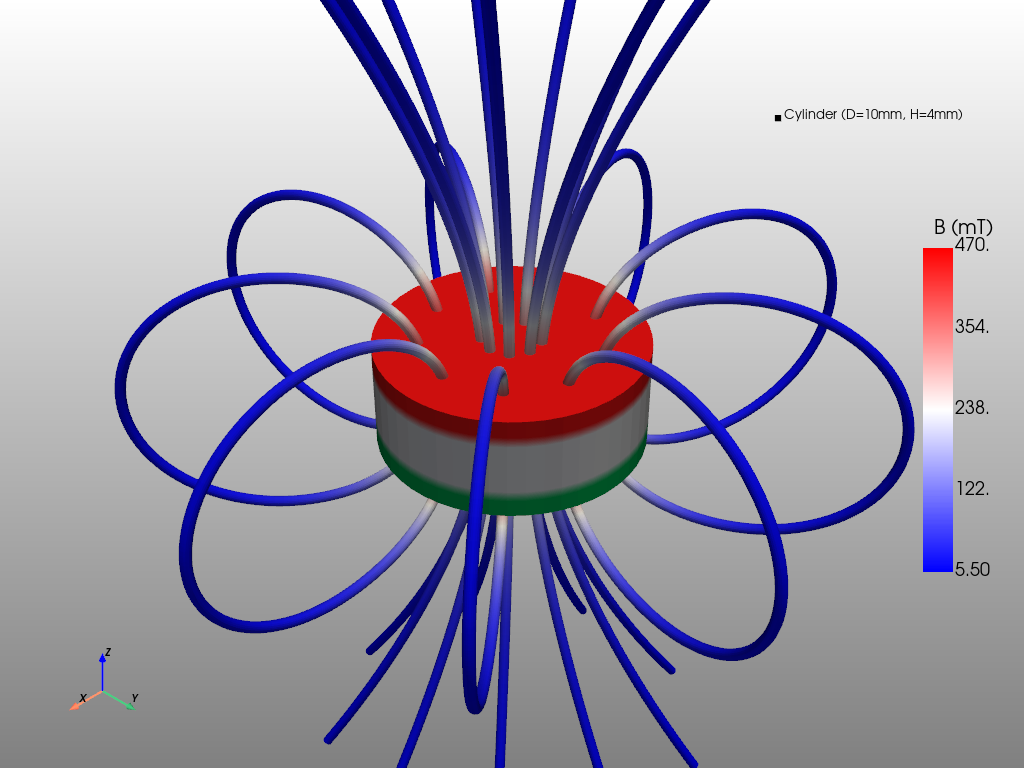

In [1]:
import magpylib as magpy
import pyvista as pv

# Create a magnet with Magpylib
magnet = magpy.magnet.Cylinder(polarization=(0, 0, 1), dimension=(0.010, 0.004))

# Create a 3D grid with Pyvista
grid = pv.ImageData(
    dimensions=(41, 41, 41),
    spacing=(0.001, 0.001, 0.001),
    origin=(-0.02, -0.02, -0.02),
)

# Compute B-field and add as data to grid
grid["B"] = magnet.getB(grid.points) * 1000  # T -> mT

# Compute the field lines
seed = pv.Disc(inner=0.001, outer=0.003, r_res=1, c_res=9)
strl = grid.streamlines_from_source(
    seed,
    vectors="B",
    max_step_length=0.1,
    max_time=.02,
    integration_direction="both",
)

# Create a Pyvista plotting scene
pl = pv.Plotter()

# Add magnet to scene
magpy.show(magnet, canvas=pl, backend="pyvista")

# Prepare legend parameters
legend_args = {
    "title": "B (mT)",
    "title_font_size": 20,
    "color": "black",
    "position_y": 0.25,
    "vertical": True,
}

# Add streamlines and legend to scene
pl.add_mesh(
    strl.tube(radius=0.0002),
    cmap="bwr",
    scalar_bar_args=legend_args,
)

# Prepare and show scene
pl.camera.position = (0.03, 0.03, 0.03)
pl.show()